In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output
def error(phi_a,phi_n):
    # compute error between analytical and numerical numbers

    return (phi_a-phi_n)/phi_a*100

# Perform Gauss-Seidel algorithm

In [33]:
# numbering scheme used is k = (j-1)*N + i

N = 81

L = 1   # length
M = np.zeros((N,N)) # an empty matrix
S = np.zeros((N,N))
phi = np.zeros((N,N))

dx = L/(N-1)    # Grid size
dy = L/(N-1)    # Grid size

tol = 1e-3
aE = 1/dx**2
aW = 1/dx**2
aN = 1/dy**2
aS = 1/dy**2
a0 = -(2/dx**2 + 2/dy**2)


## Right BC
i = N-1 
for j in range(N):

    y = j*dy
    x = i*dx
    phi[i,j] = 0.25*np.sinh(5)+(y-0.5)**2*np.sinh(10*(y-0.5))+np.exp(2*y)

## left BC
i = 0
for j in range(N):
    
    y = j*dy
    x = i*dx
    
    phi[i,j] = 0.25*np.sinh(-5) + (y-0.5)**2*np.sinh(10*(y-0.5))+1

## Bottom BC
j=0
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (x-0.5)**2*np.sinh(10*(x-0.5))+1

## Top BC
j=N-1
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(5)+(x-0.5)**2*np.sinh(10*(x-0.5))+np.exp(2*x)

for _ in tqdm(range(10000)):

    for i in range(1,N-1):
        
        for j in range(1,N-1):
            
            x = i*dx
            y = j*dy

            S[i,j] = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            
            phi[i,j] = (S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1]) / a0

    # Calculate residual
    R2 = 0
    R = np.zeros((N,N))
    for i in range(1,N-1):
        
        for j in range(1,N-1):
            R[i,j] = S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1] - a0*phi[i,j]
            R2 = R2+R[i,j]**2

    R2 = np.sqrt(R2)
    if _ %500==0:
        clear_output(True)
        print(R2)
        
    if R2<tol:
        break


 95%|█████████▌| 9504/10000 [09:36<00:30, 16.46it/s]

0.0010803737941755575


 96%|█████████▌| 9551/10000 [09:39<00:27, 16.48it/s]


In [35]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

Text(0.5, 1.0, 'Lines with colorbar')

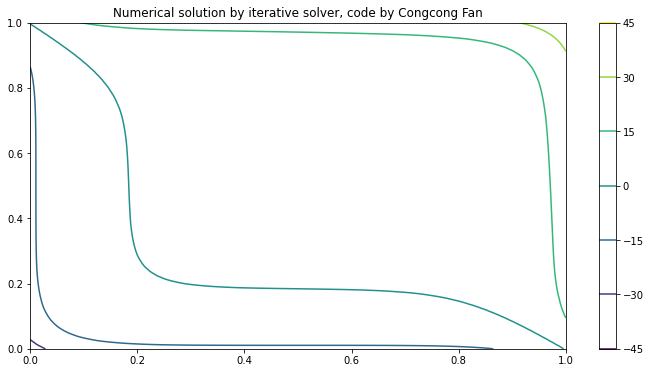

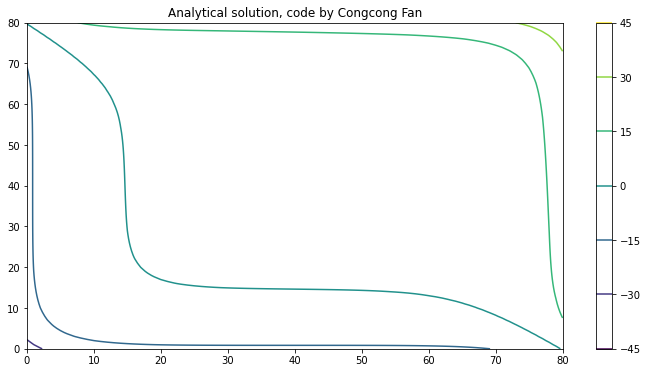

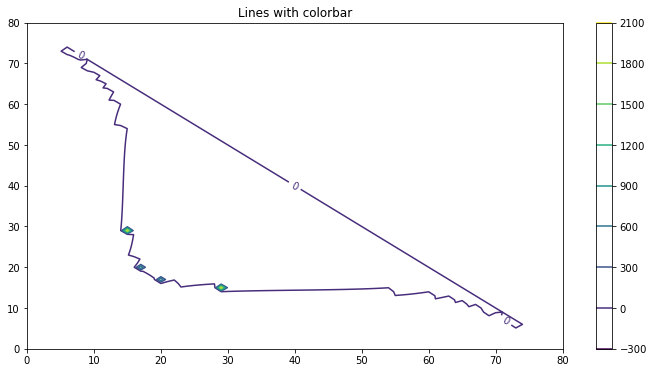

In [47]:
x,y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
plt.figure(figsize=(12,6))
plt.contour(x,y,phi)
plt.title('Numerical solution by iterative solver, code by Congcong Fan')
plt.colorbar()


plt.figure(figsize=(12,6))
plt.title('Analytical solution, code by Congcong Fan')
plt.contour(phi_A)
plt.colorbar()

# Error
e = error(phi_A,phi)
fig, ax = plt.subplots(figsize=(12,6))
CS = ax.contour(e)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Errors, code by Congcong Fan')
# make a colorbar for the contour lines
CB = fig.colorbar(CS)

ax.set_title('Lines with colorbar')






# Line-by-line method, row-wise. e.g. solve at constant j direction then march in j direction

In [139]:
def TRI(N,a,d,c,b):
    # Tridiagonal matrix solver
    phi = np.zeros(N)

    
    for i in range (1,N):
        const = a[i-1] / d[i-1]
        d[i] = d[i] - const*c[i-1]
        b[i] = b[i] - const*b[i-1]
    
    phi[N-1] = b[N-1]/d[N-1]

    for i in range(N-2,0,-1):
        
        phi[i] = (b[i] - c[i]*phi[i+1]) / d[i]

    return phi

In [144]:
# numbering scheme used is k = (j-1)*N + i

N = 41

L = 1   # length
M = np.zeros((N,N)) # an empty matrix
S = np.zeros((N,N))
phi = np.ones((N,N))

dx = L/(N-1)    # Grid size
dy = L/(N-1)    # Grid size

tol = 1e-3
c = np.zeros(N-1)
a = np.zeros(N-1)
d = np.zeros(N)
b = np.zeros(N)



aE = 1/dx**2
aW = 1/dx**2
aN = 1/dy**2
aS = 1/dy**2
a0 = -(2/dx**2 + 2/dy**2)


    
## Right BC
i = N-1 
for j in range(N):

    x = i*dx
    y = j*dy
    phi[i,j] = 0.25*np.sinh(5)+(y-0.5)**2*np.sinh(10*(y-0.5))+np.exp(2*y)

## left BC
i = 0
for j in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (y-0.5)**2*np.sinh(10*(y-0.5))+1

## Bottom BC
j=0
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (x-0.5)**2*np.sinh(10*(x-0.5))+1

## Top BC
j=N-1
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(5)+(x-0.5)**2*np.sinh(10*(x-0.5))+np.exp(2*x)

    
for _ in tqdm(range(100000)):
    for j in range(1,N-1):
        d[0] = 1

        # Left BC
        b[0] = phi[0,j]

        for i in range(1,N-1):
            x = i*dx
            y = j*dy
            
            d[i] = -(2/dx**2 + 2/dy**2)
            a[i-1] = 1/dx**2
            c[i] = 1/dx**2

            sij = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            b[i] = sij - phi[i,j+1]/dy**2 - phi[i,j-1]/dy**2

        d[N-1]=1
        
        # Right BC
        
        b[N-1] = phi[-1,j]
        
        phix = TRI(N,a,d,c,b)

        phi[:,j] = phix
        
    # Calculate residual
    R2 = 0
    R = np.zeros((N,N))
    for i in range(1,N-1):
        
        for j in range(1,N-1):
            x = i*dx
            y = j*dy
            sij = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            
            R[i,j] = sij - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1] - a0*phi[i,j]
            R2 = R2+R[i,j]**2

    R2 = np.sqrt(R2)
    if _ %500==0:
        clear_output(True)
        print(R2)
        
    if R2<tol:
        break



  1%|          | 1005/100000 [00:34<56:34, 29.16it/s]

0.015695177315900026


  1%|          | 1224/100000 [00:41<56:18, 29.24it/s]


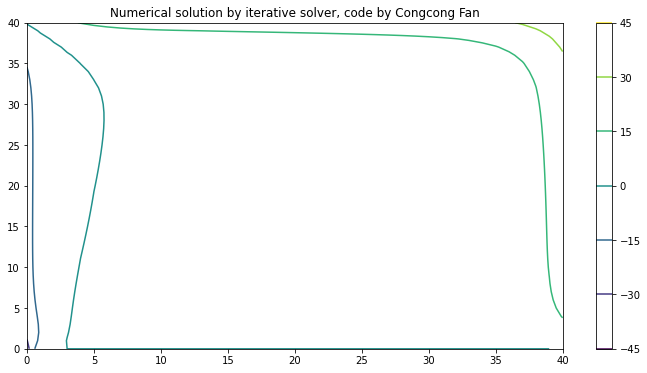

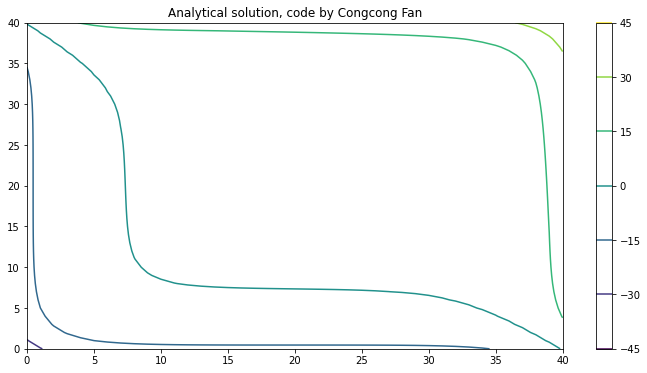

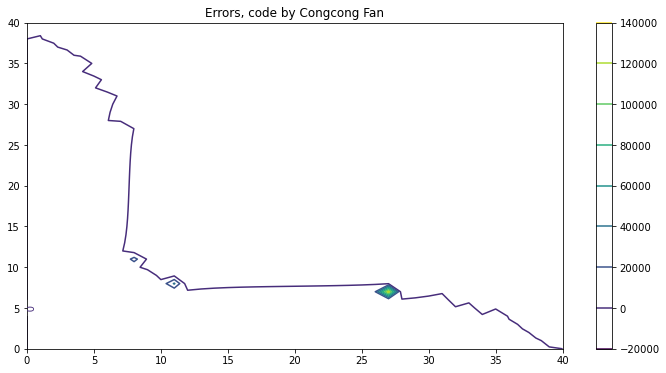

In [146]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])
        
x,y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
plt.figure(figsize=(12,6))
plt.contour(phi)
plt.title('Numerical solution by iterative solver, code by Congcong Fan')
plt.colorbar()


plt.figure(figsize=(12,6))
plt.title('Analytical solution, code by Congcong Fan')
plt.contour(phi_A)
plt.colorbar()

# Error
e = error(phi_A,phi)
fig, ax = plt.subplots(figsize=(12,6))
CS = ax.contour(e)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Errors, code by Congcong Fan')
# make a colorbar for the contour lines
CB = fig.colorbar(CS)






